In [38]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

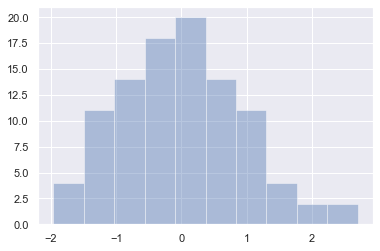

In [37]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False)

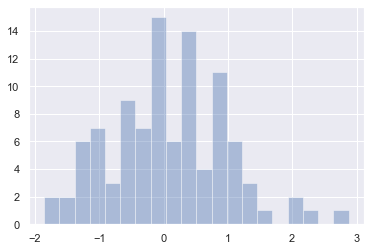

In [4]:
sns.distplot(x, bins=20, kde=False)

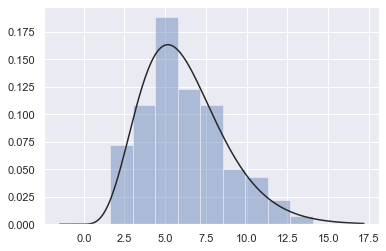

In [8]:
# 数据分布情况

x = np.random.gamma(6, size=100)
sns.distplot(x, kde=False, fit=stats.gamma)

In [9]:
# 根据均值和协方差生成数据

mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])
df

,x,y
0,-0.894659,1.404090
1,-0.178458,1.709926
2,-0.872751,-1.036522
3,-0.463592,0.175799
4,-1.375423,1.116728
...,...,...
195,-0.137045,-0.196305
196,-0.787372,-0.006961
197,0.852876,1.998379
198,-0.894438,1.060715


## 观测两个变量之间的分布关系最好是用`散点图`

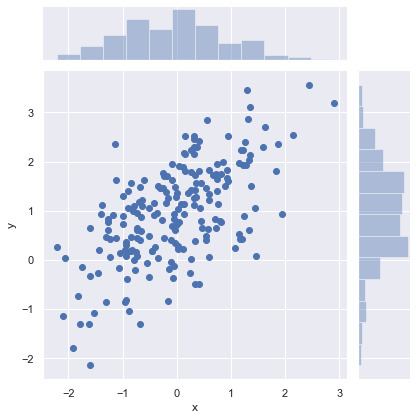

In [10]:
sns.jointplot(x="x", y="y", data=df)

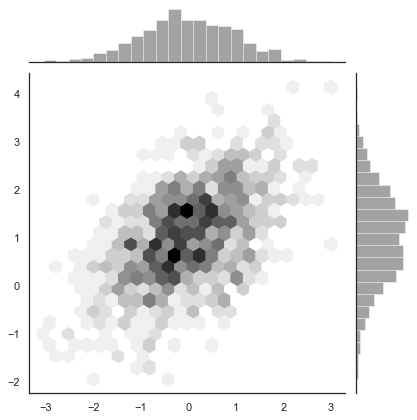

In [11]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind='hex', color="k")

## 一组多维数据，两两特征值对比

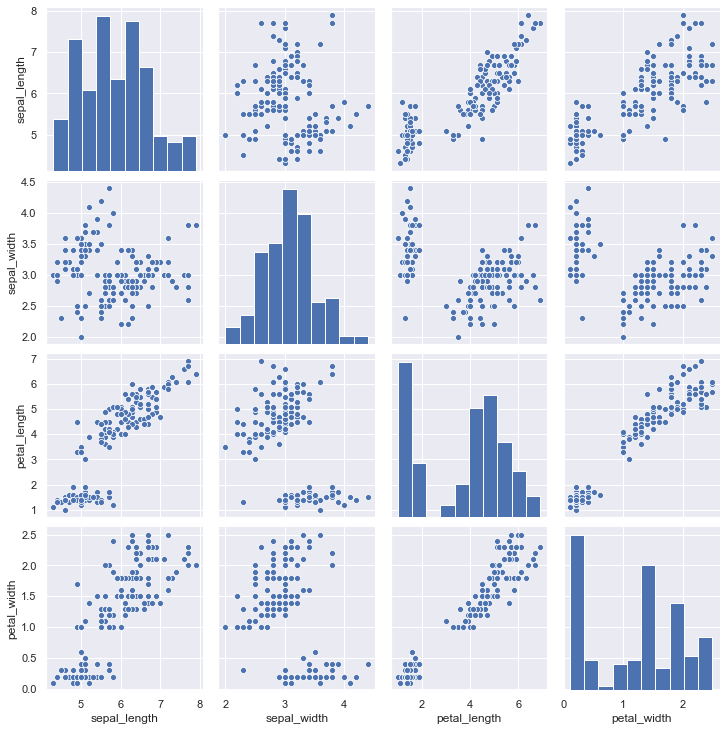

In [13]:
iris = sns.load_dataset('iris')
sns.pairplot(iris)

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


regplot() 和 lmplot() 都可以绘制回归关系，推荐使用 regplot()

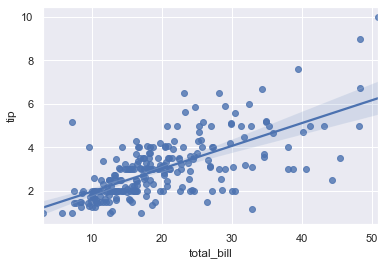

In [15]:
sns.regplot(x="total_bill", y="tip", data=tips)

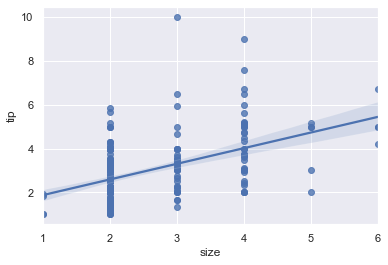

In [16]:
sns.regplot(x="size", y="tip", data=tips)

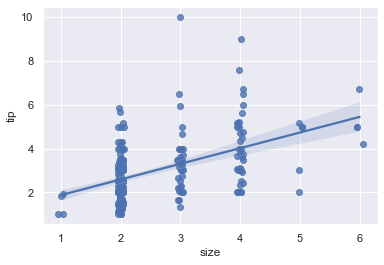

In [17]:
# x_jitter 对 x 轴数据进行左右抖动

sns.regplot(x="size", y="tip", data=tips, x_jitter=.05) 

In [20]:
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


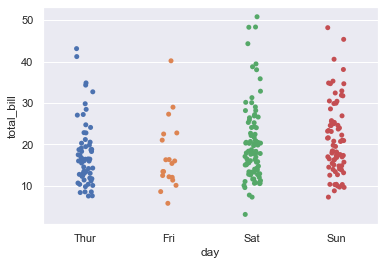

In [21]:
sns.stripplot(x="day", y="total_bill", data=tips)

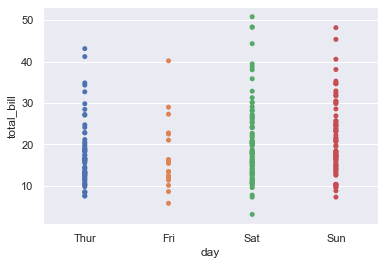

In [23]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False)

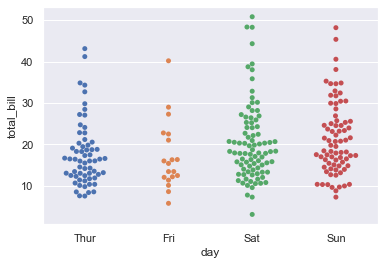

In [24]:
sns.swarmplot(x="day", y="total_bill", data=tips)

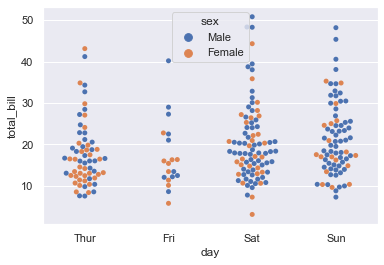

In [25]:
sns.swarmplot(x="day", y="total_bill", data=tips, hue='sex')

## 盒图
+ IQR 即统计学概念四分位距，第一/四分位与第三/四分位之间的距离
+ N = 1.5IQR, 如果一个值 >Q3+N 或 < Q1-N，则为离群点

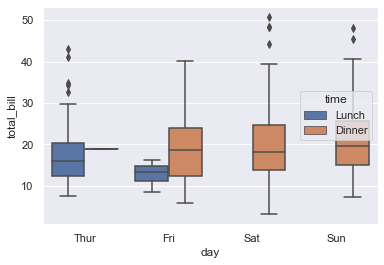

In [46]:
sns.boxplot(x="day", y="total_bill", hue='time', data=tips)

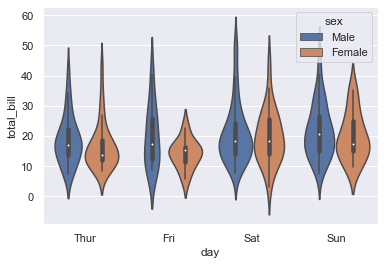

In [33]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)

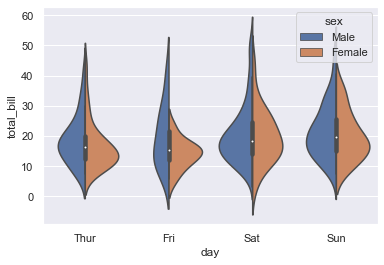

In [32]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

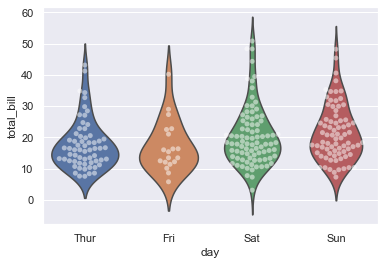

In [34]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color='w', alpha=.5)

## 显示数据的集中趋势可以用条形图

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


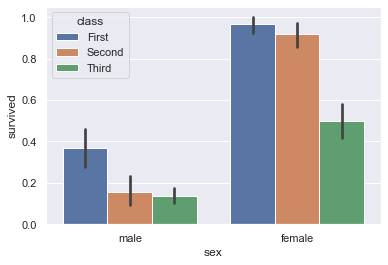

In [35]:
sns.barplot(x='sex', y='survived', hue='class', data=titanic)

## 点图可以更好地描述变化差异

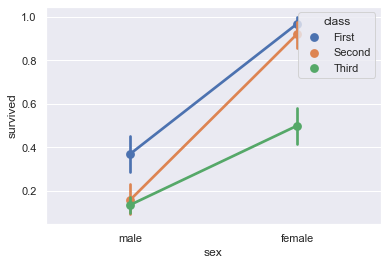

In [40]:
sns.pointplot(x='sex', y='survived', hue='class', data=titanic)

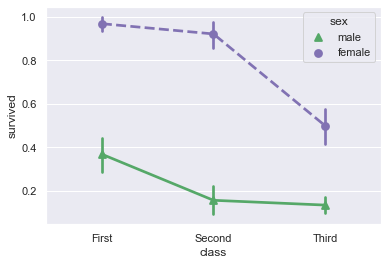

In [41]:
sns.pointplot(x='class', y='survived', hue='sex', data=titanic,
             palette={"male" : "g", "female" : "m"},
             markers=["^", "o"], linestyles=["-", "--"])

In [52]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


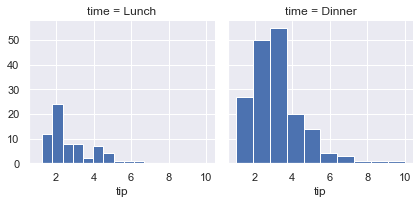

In [57]:
g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, "tip")

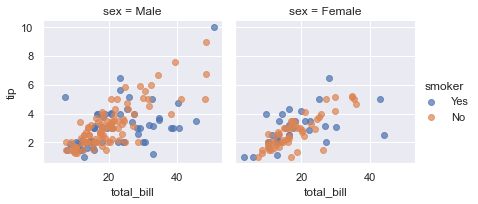

In [58]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

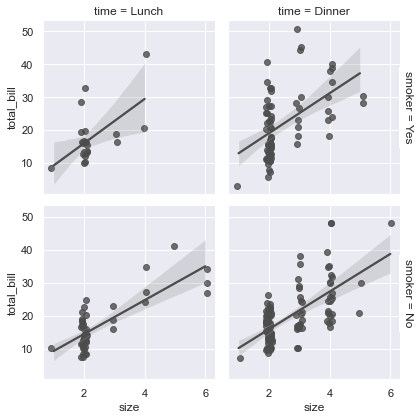

In [62]:
g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
g.map(sns.regplot, 'size', 'total_bill', color='.3', fit_reg=True, x_jitter=.1)

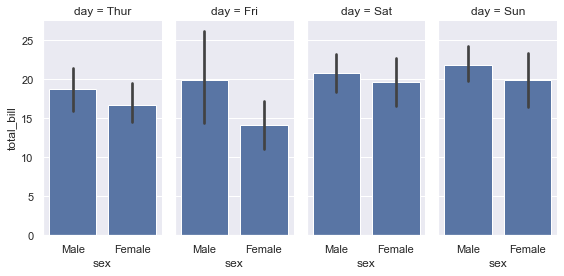

In [64]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, 'sex', 'total_bill')

In [69]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [66]:
from pandas import Categorical
ordered_days = tips.day.value_counts().index
print(ordered_days)

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


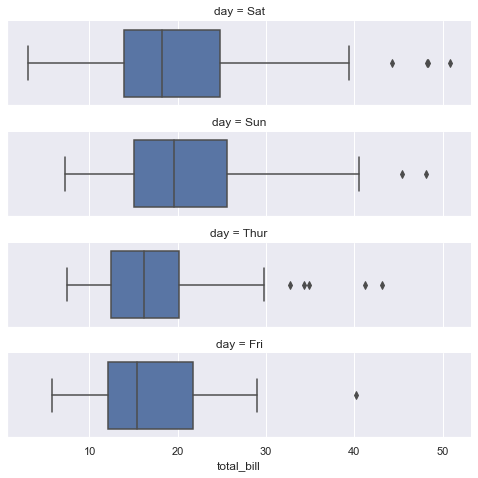

In [72]:
g = sns.FacetGrid(tips, row='day', row_order=ordered_days, height=1.7, aspect=4)
g.map(sns.boxplot, 'total_bill', order='v')

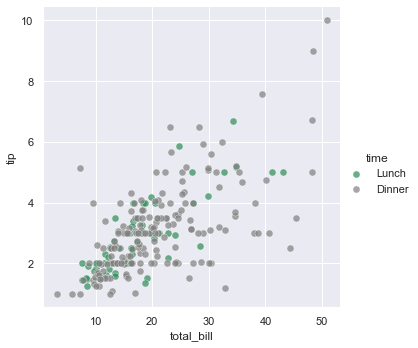

In [78]:
pal = dict(Lunch="seagreen", Dinner='gray')
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, 'total_bill', 'tip', s=50, alpha=.7, linewidth=.5, edgecolor='white')
g.add_legend()

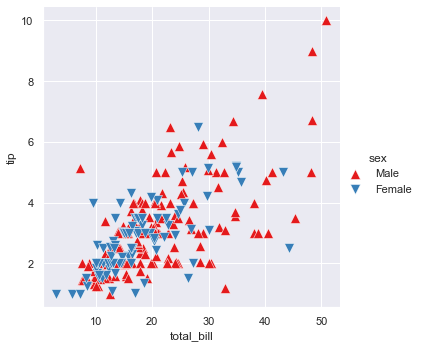

In [82]:
g = sns.FacetGrid(tips, hue='sex', palette='Set1', height=5, hue_kws={"marker" : ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor='white')
g.add_legend()

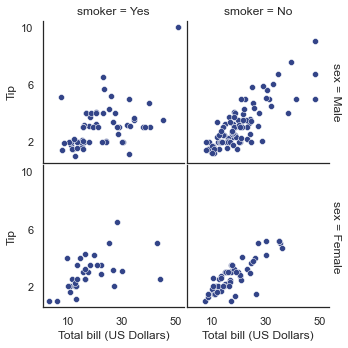

In [84]:
with sns.axes_style('white'):
    g = sns.FacetGrid(tips, row='sex', col='smoker', margin_titles=True, height=2.5)
g.map(plt.scatter, 'total_bill', 'tip', color='#334488', edgecolor='white', lw=.5)
g.set_axis_labels('Total bill (US Dollars)', 'Tip')
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.02, hspace=.02)

In [86]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


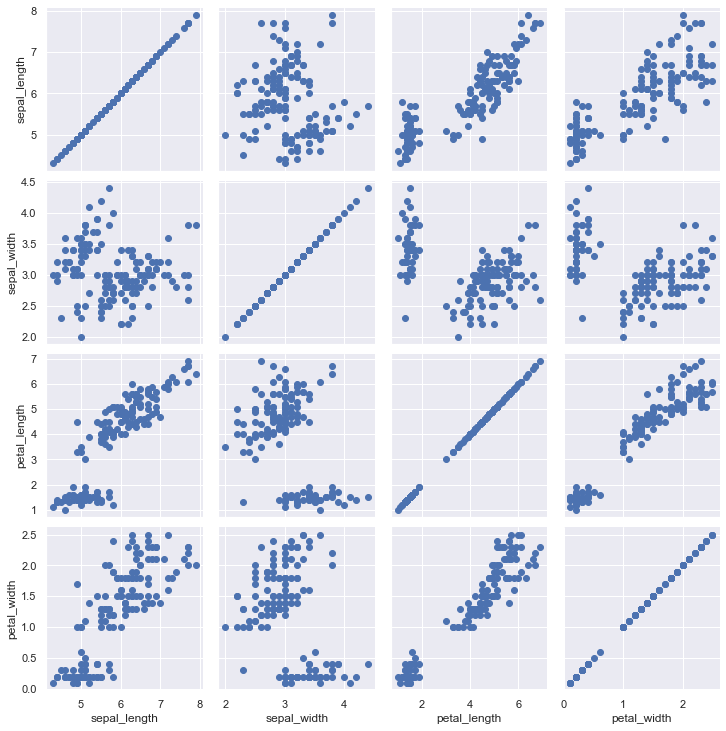

In [85]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris)
g.map(plt.scatter)

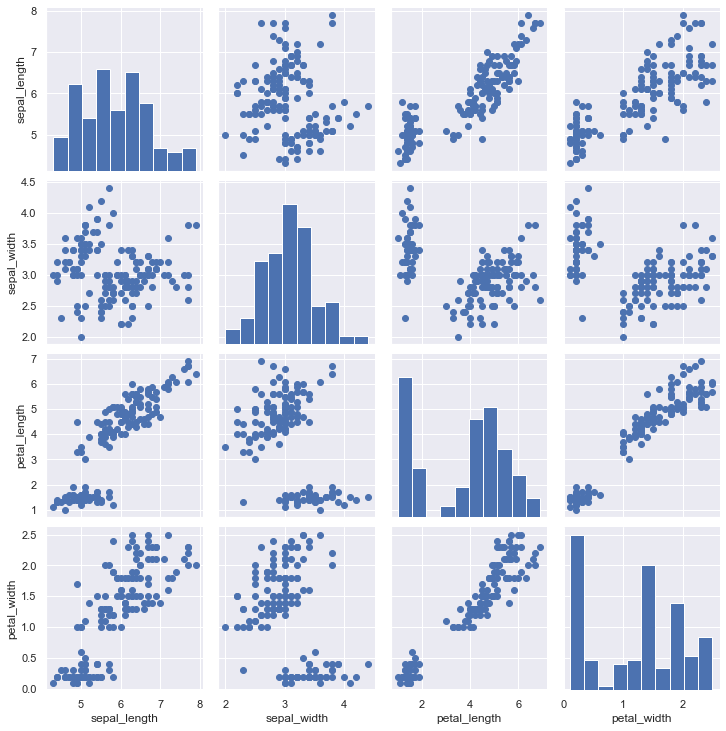

In [87]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

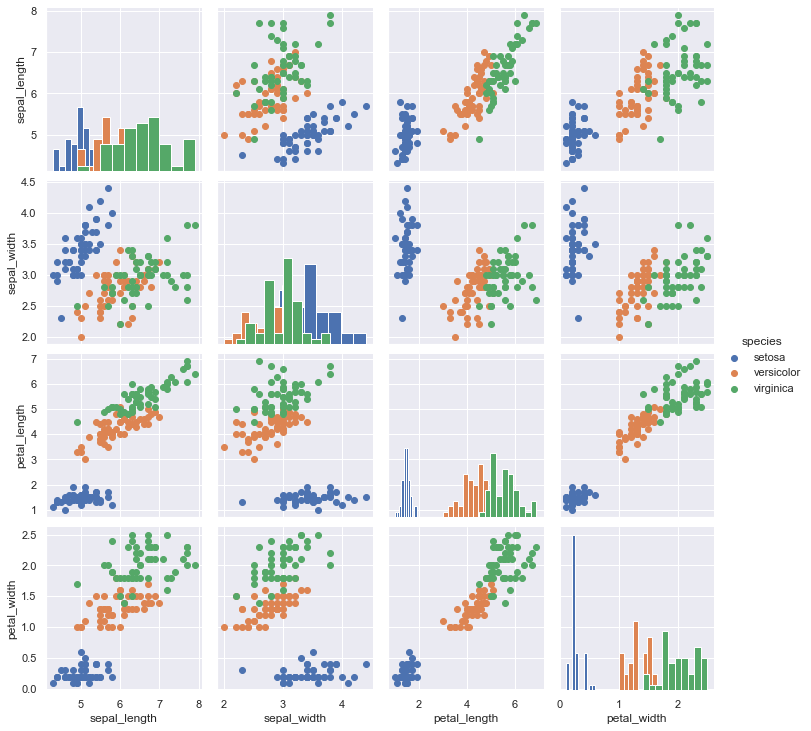

In [88]:
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

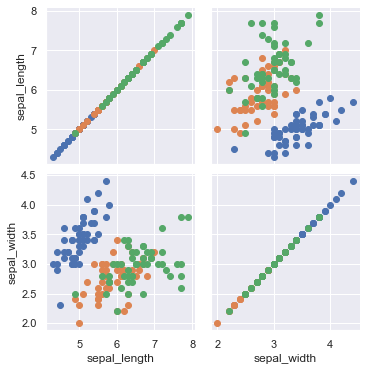

In [91]:
g = sns.PairGrid(iris, vars=['sepal_length', 'sepal_width'], hue='species')
g.map(plt.scatter)
g.add_legend()

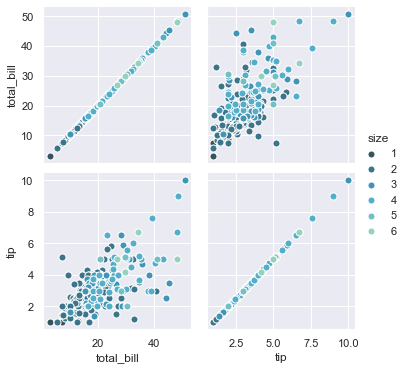

In [92]:
g = sns.PairGrid(tips, hue='size', palette='GnBu_d')
g.map(plt.scatter, s=50, edgecolor='white')
g.add_legend()

In [93]:
uniform_data = np.random.rand(3, 3)
uniform_data

array([[0.07814336, 0.4276482 , 0.83054453],
       [0.13204854, 0.07672963, 0.66629333],
       [0.22033649, 0.11724532, 0.38620062]])

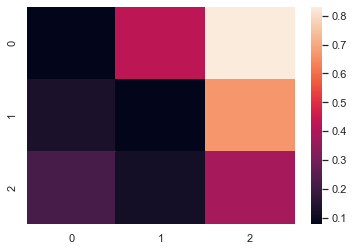

In [94]:
sns.heatmap(uniform_data)

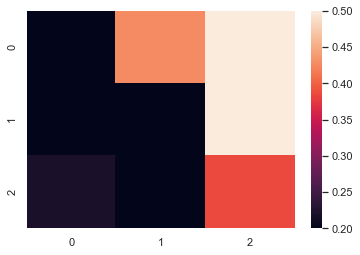

In [96]:
# 小于 0.2 的值用 0.2 对应的颜色标记
# 大于 0.5 的值用 0.5对应的颜色标记

sns.heatmap(uniform_data, vmin=0.2, vmax=0.5)

In [97]:
normal_data = np.random.randn(3, 3)
normal_data

array([[ 2.10754876, -1.17764872,  0.28827707],
       [ 0.16372783,  0.42694823, -0.71200224],
       [ 1.34948825, -1.53223216, -0.16661943]])

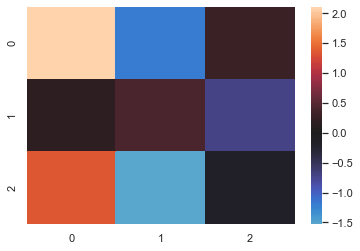

In [98]:
sns.heatmap(normal_data, center=0)

In [106]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [107]:
_flights = flights.pivot(index='month', columns='year', values='passengers')
_flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


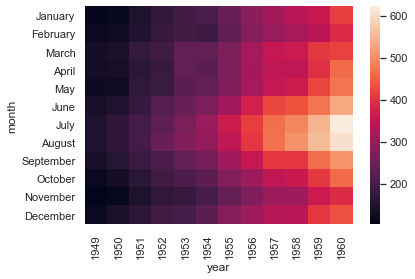

In [109]:
sns.heatmap(_flights)

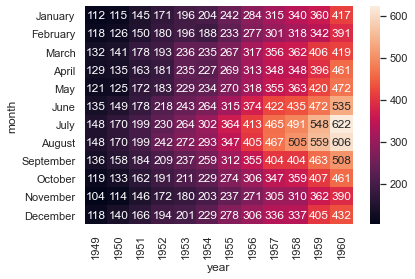

In [110]:
sns.heatmap(_flights, annot=True, fmt='d')

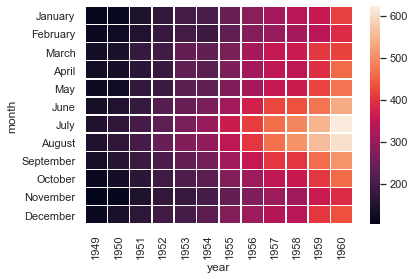

In [111]:
sns.heatmap(_flights, linewidths=.5)

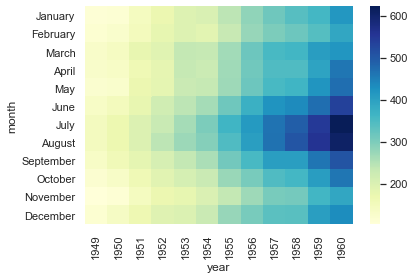

In [112]:
sns.heatmap(_flights, cmap='YlGnBu')

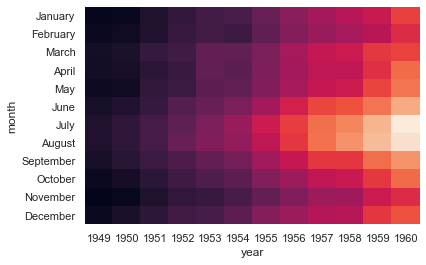

In [113]:
# 隐藏 Color Bar

sns.heatmap(_flights, cbar=False)

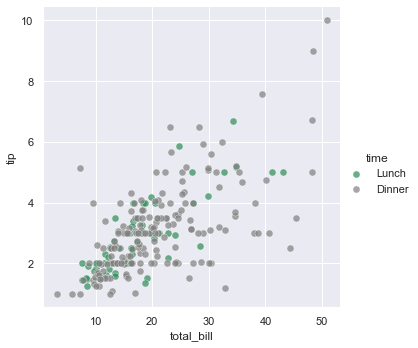

In [79]:
pal = dict(Lunch="seagreen", Dinner='gray')
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, 'total_bill', 'tip', s=50, alpha=.7, linewidth=.5, edgecolor='white')
g.add_legend()